In [51]:
# Find the most common map, choose emotion_W1_11 as seed
from operator import add
import numpy as np
def Find(X,map):
    I=[]
    for i in range(0,7):

        D=X[i]
        import operator
        index, value = max(enumerate(D[map]), key=operator.itemgetter(1))
        I.append(index)
    return I
taskname='EMOTION'    
D1=np.load('/storage/HCP_Group_DBN/Overlap/'+taskname+'_D1.npy')
print(Find(D1,11))
tasks=['EMOTION','GAMBLING','LANGUAGE','MOTOR','RELATIONAL','SOCIAL','WM']

0.8179800221975583
[21, 23, 76, 3, 49, 88, 71]


In [40]:
from operator import add
import numpy as np
def MFScore(X,idx):
    MultiFuncScore=[0] * 100
    T=0.25
    for i in range(0,7):

        D=X[i]
        D[D<T]=0
        D[D>T]=1
        M=np.sum(D,axis=1)
        M[M>1]=1
        if i==idx:
            M=[1] * 100
        #element-wise adding up lists
        MultiFuncScore=list( map(add, MultiFuncScore, M) )
    return MultiFuncScore
taskname='EMOTION'    
idx=0
D1=np.load('/storage/HCP_Group_DBN/Overlap/'+taskname+'_D1.npy')
Score=MFScore(D1,idx)
print(Score)

[7.0, 7.0, 7.0, 7.0, 5.0, 2.0, 6.0, 4.0, 6.0, 4.0, 6.0, 6.0, 6.0, 6.0, 7.0, 3.0, 3.0, 4.0, 7.0, 6.0, 7.0, 6.0, 3.0, 4.0, 6.0, 2.0, 6.0, 3.0, 4.0, 6.0, 5.0, 6.0, 4.0, 2.0, 5.0, 6.0, 4.0, 5.0, 1.0, 6.0, 7.0, 4.0, 5.0, 3.0, 1.0, 7.0, 5.0, 6.0, 3.0, 3.0, 3.0, 7.0, 5.0, 6.0, 6.0, 5.0, 4.0, 4.0, 3.0, 6.0, 4.0, 2.0, 6.0, 7.0, 4.0, 5.0, 5.0, 3.0, 1.0, 2.0, 2.0, 3.0, 1.0, 5.0, 6.0, 7.0, 4.0, 3.0, 5.0, 2.0, 5.0, 4.0, 5.0, 6.0, 7.0, 6.0, 6.0, 3.0, 1.0, 5.0, 2.0, 5.0, 7.0, 7.0, 4.0, 2.0, 3.0, 6.0, 2.0, 7.0]


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# X=list(range(0,100))
X=np.arange(0,100)
def plot(Score,taskname,file,layer):
    plt.figure(figsize=(10, 2))

    plt.ylim(0, 7)
    plt.xlim(0, 100)

#     plt.yticks(np.arange(7), tasks)
    plt.bar(X,Score,color="r")
    plt.tick_params(labelsize=14)
    plt.xlabel('Layer '+str(layer)+' ICN of '+taskname+ ' task', fontsize=14)
    plt.ylabel('MFScore', fontsize=14)
    plt.xticks(np.arange(0, 100, step=10))
    plt.yticks(np.arange(0, 7, step=1))

#     plt.tight_layout()

    plt.savefig(file)
#     return sns_plot

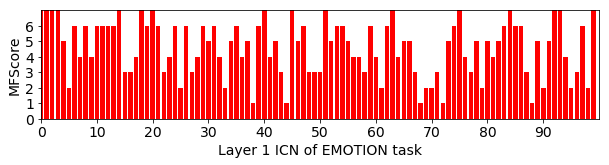

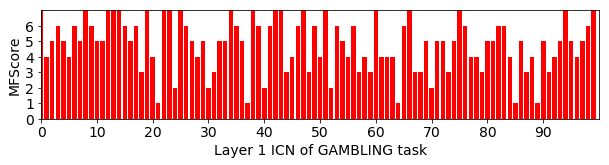

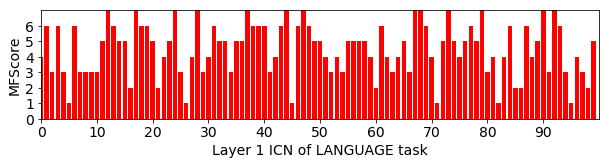

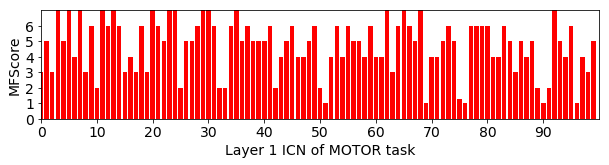

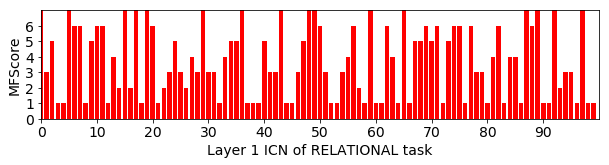

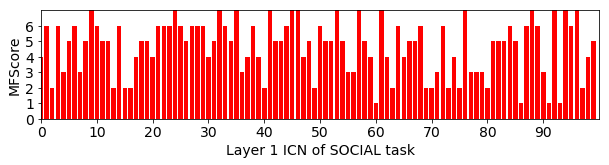

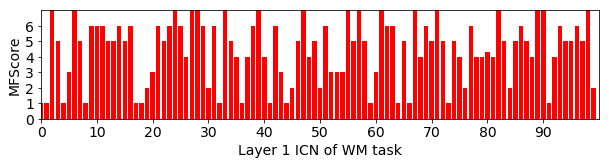

In [42]:

tasks=['EMOTION','GAMBLING','LANGUAGE','MOTOR','RELATIONAL','SOCIAL','WM']
for idx,taskname in enumerate(tasks):
    D1=np.load('/storage/HCP_Group_DBN/Overlap/'+taskname+'_D1.npy')
    Score=MFScore(D1,idx)
    plot(Score,taskname,'/storage/HCP_Group_DBN/MultiFunction/'+taskname+'_D1.png',1)


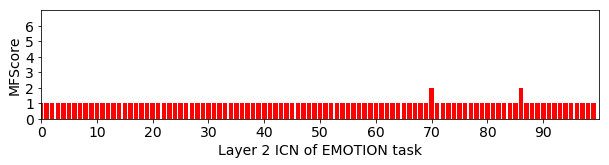

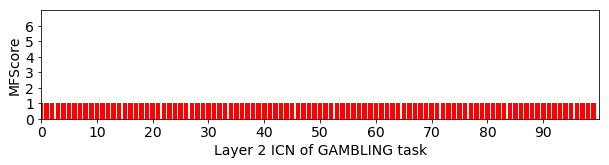

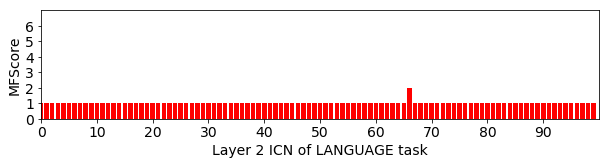

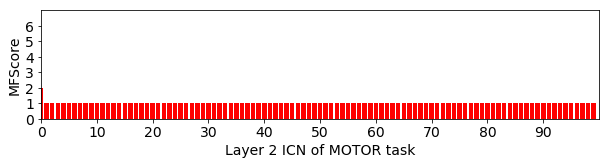

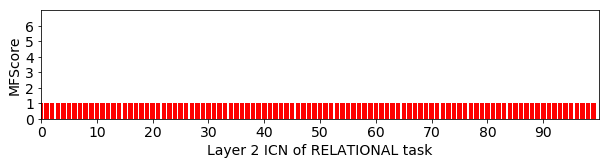

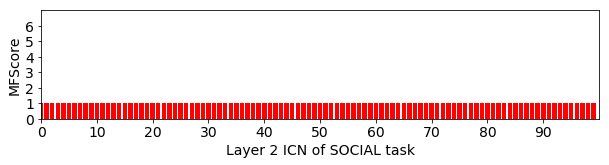

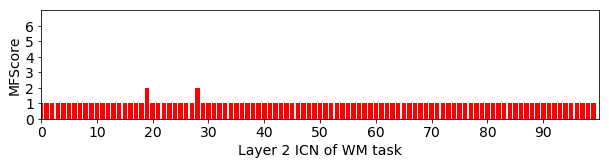

In [43]:
tasks=['EMOTION','GAMBLING','LANGUAGE','MOTOR','RELATIONAL','SOCIAL','WM']
for idx,taskname in enumerate(tasks):
    D2=np.load('/storage/HCP_Group_DBN/Overlap/'+taskname+'_D2.npy')
    Score=MFScore(D2,idx)
    plot(Score,taskname,'/storage/HCP_Group_DBN/MultiFunction/'+taskname+'_D2.png',2)

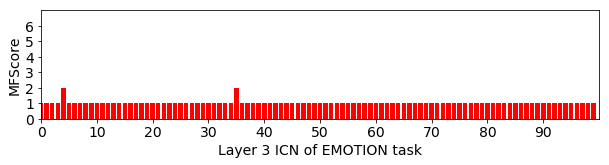

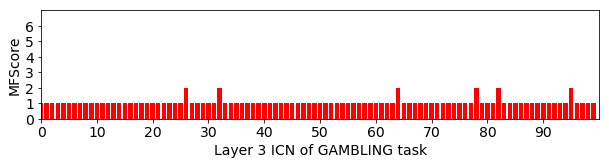

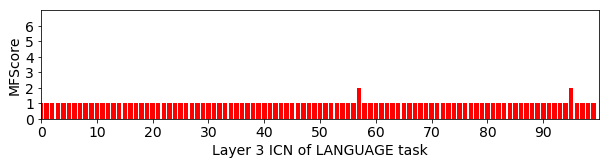

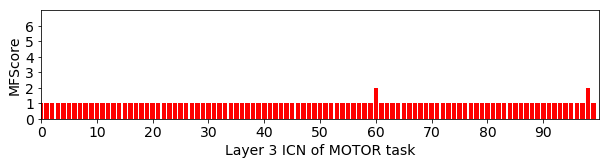

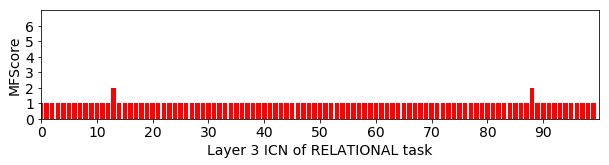

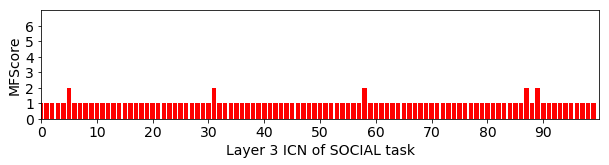

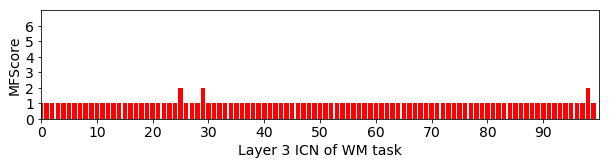

In [33]:
tasks=['EMOTION','GAMBLING','LANGUAGE','MOTOR','RELATIONAL','SOCIAL','WM']
for idx,taskname in enumerate(tasks):
    D3=np.load('/storage/HCP_Group_DBN/Overlap/'+taskname+'_D3.npy')
    Score=MFScore(D3,idx)
    plot(Score,taskname,'/storage/HCP_Group_DBN/MultiFunction/'+taskname+'_D3.png',3)

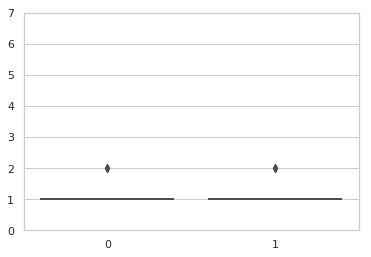

In [14]:
plt.figure()
plt.ylim(0, 7)
sns.boxplot(data=[np.asarray(Score),np.asarray(Score)],notch=1)